In [12]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import utils

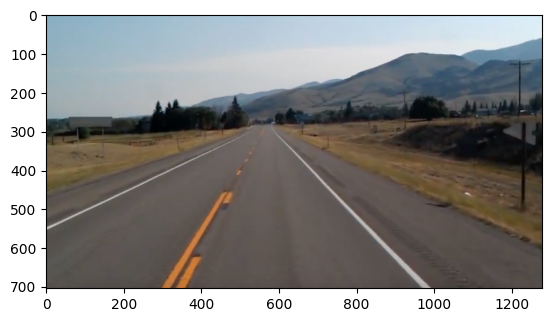

In [13]:
img =  cv.imread('./assets/images/road.jpg')
plt.imshow(img[...,::-1])

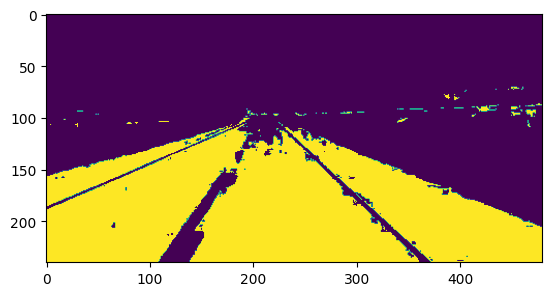

In [14]:
# Convert RGB to HSV
img = cv.resize(img, (480, 240))
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

threshold_img = utils.thresholding(img, 0, 0, 62, 36, 54, 110)
plt.imshow(threshold_img)

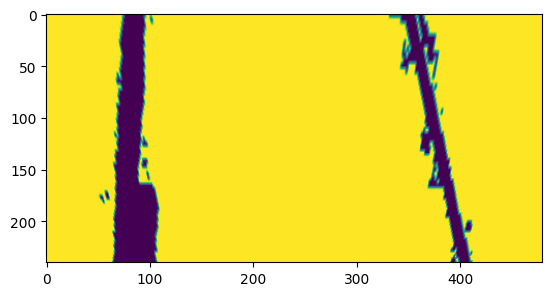

In [15]:
# Warp img to birds-eye view
h, w, c = img.shape
warped_img = utils.warp_img(threshold_img, [[116, 175],[364, 175],[ 66, 232],[414, 232]], w, h)
plt.imshow(warped_img)

In [16]:
# Pixel summation
left, right = utils.calculate_pixel_sum(warped_img)
print(right)

13670326


In [20]:
# Test on video
cap = cv.VideoCapture("./assets/videos/road_vid.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        cap.set(cv.CAP_PROP_POS_FRAMES, 0)
        continue
    
    hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    threshold_frame = utils.thresholding(hsv_frame, 0, 0, 62, 36, 54, 110)
    h, w, c = frame.shape
    warped_frame = utils.warp_img(threshold_frame, [[116, 175],[364, 175],[66, 232],[414, 232]], w, h)
    cv.imshow("result", warped_frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()